In [12]:
from tensorflow.keras.datasets import imdb

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow import keras

In [2]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

In [4]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [6]:
train_seq.shape

(20000, 100)

In [7]:
val_seq.shape

(5000, 100)

In [8]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target), batch_size=64, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6915 - accuracy: 0.5768 - val_loss: 0.6908 - val_accuracy: 0.5872
Epoch 2/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6887 - accuracy: 0.6245 - val_loss: 0.6870 - val_accuracy: 0.6210
Epoch 3/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6811 - accuracy: 0.6384 - val_loss: 0.6738 - val_accuracy: 0.5838
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6396 - accuracy: 0.6164 - val_loss: 0.6197 - val_accuracy: 0.6916
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5980 - accuracy: 0.7283 - val_loss: 0.5918 - val_accuracy: 0.7490
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5736 - accuracy: 0.7612 - val_loss: 0.5712 - val_accuracy: 0.7628
Epoch 7/100
313/313 [==============================] - 15s 48ms/step - loss: 0.5542 - accuracy: 0.7724 - val_loss: 0.5532 - val_ac

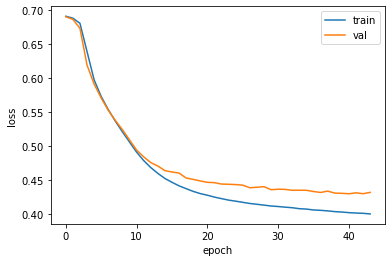

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6910 - accuracy: 0.5896 - val_loss: 0.6900 - val_accuracy: 0.6138
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6880 - accuracy: 0.6215 - val_loss: 0.6860 - val_accuracy: 0.6332
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6824 - accuracy: 0.6330 - val_loss: 0.6777 - val_accuracy: 0.6494
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6677 - accuracy: 0.6479 - val_loss: 0.6503 - val_accuracy: 0.6852
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6195 - accuracy: 0.7174 - val_loss: 0.5895 - val_accuracy: 0.7392
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5800 - accuracy: 0.7387 - val_loss: 0.5670 - val_accuracy: 0.7448
Epoch 7/100
313/313 [==============================] - 15s 47ms/step - loss: 0.5581 - accuracy: 0.7466 - val_loss: 0.5509 - val_ac

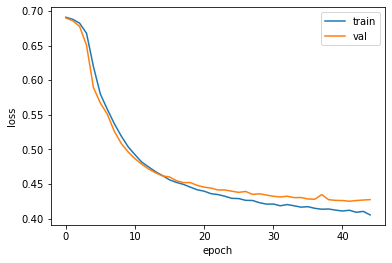

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [25]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_4 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 22s 69ms/step - loss: 0.6913 - accuracy: 0.5831 - val_loss: 0.6900 - val_accuracy: 0.5802
Epoch 2/100
313/313 [==============================] - 23s 75ms/step - loss: 0.6850 - accuracy: 0.6327 - val_loss: 0.6776 - val_accuracy: 0.6700
Epoch 3/100
313/313 [==============================] - 26s 84ms/step - loss: 0.6477 - accuracy: 0.6758 - val_loss: 0.6035 - val_accuracy: 0.7162
Epoch 4/100
313/313 [==============================] - 33s 105ms/step - loss: 0.5717 - accuracy: 0.7215 - val_loss: 0.5494 - val_accuracy: 0.7244
Epoch 5/100
313/313 [==============================] - 23s 73ms/step - loss: 0.5386 - accuracy: 0.7359 - val_loss: 0.5272 - val_accuracy: 0.7414
Epoch 6/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5176 - accuracy: 0.7517 - val_loss: 0.5145 - val_accuracy: 0.7520
Epoch 7/100
313/313 [==============================] - 26s 83ms/step - loss: 0.5027 - accuracy: 0.7627 - val_loss: 0.4958 - val_a

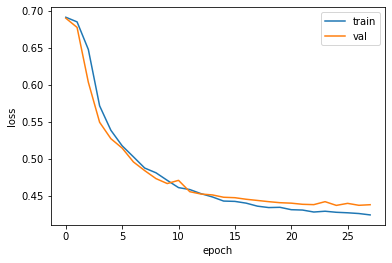

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [39]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [40]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 624       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [41]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6926 - accuracy: 0.5263 - val_loss: 0.6920 - val_accuracy: 0.5368
Epoch 2/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6906 - accuracy: 0.5712 - val_loss: 0.6897 - val_accuracy: 0.5736
Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6873 - accuracy: 0.5993 - val_loss: 0.6858 - val_accuracy: 0.5980
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6815 - accuracy: 0.6211 - val_loss: 0.6786 - val_accuracy: 0.6176
Epoch 5/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6710 - accuracy: 0.6385 - val_loss: 0.6657 - val_accuracy: 0.6366
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6518 - accuracy: 0.6581 - val_loss: 0.6408 - val_accuracy: 0.6646
Epoch 7/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6113 - accuracy: 0.6956 - val_loss: 0.5807 - val_ac

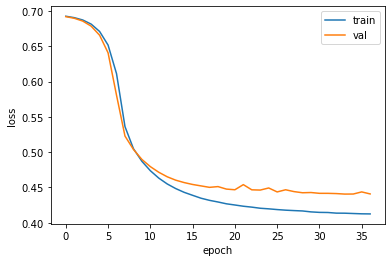

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [43]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 8s 10ms/step - loss: 0.4303 - accuracy: 0.8000


[0.43030714988708496, 0.800000011920929]